In [11]:
import pandas as pd
import seaborn as sns
import requests
    
quantity = 100
cars = []

for n in range(6):
    start = n * quantity
    url = f"https://www.carmax.com/cars/api/search/run?uri=%2Fcars%2Ftesla&skip={start}&take={quantity}"
    headers = {
        "User-Agent": "Mozilla/5.0 (X11; Ubuntu; Linux x86_64; rv:109.0) Gecko/20100101 Firefox/115.0",
        "Accept": "*/*",
        "Accept-Language": "en-US,en;q=0.5",
        "Content-Type": "application/json",
        "Sec-Fetch-Dest": "empty",
        "Sec-Fetch-Mode": "cors",
        "Sec-Fetch-Site": "same-origin",
        "Sec-GPC": "1"
    }

    response = requests.get(url, headers=headers)

    if response.status_code == 200:
        print("Request successful!")
        data = response.json()
        cars +=  data["items"]
    else:
        print("Failed to retrieve data:", response.status_code, response.text)

Request successful!
Request successful!
Request successful!
Request successful!
Request successful!
Request successful!


In [12]:
df = pd.DataFrame(cars)
print(len(df))
df["store"] = pd.json_normalize(df["store"])["name"]
df["url"] = [f"https://www.carmax.com/car/{str(x)}" for x in df["stockNumber"].values]
print(df.keys())
df.head()

386
Index(['stockNumber', 'vin', 'year', 'make', 'model', 'body', 'trim',
       'basePrice', 'originalPrice', 'hasPriceDrop', 'priceDropDate', 'msrp',
       'mileage', 'storeId', 'storeName', 'storeCity', 'geoCity', 'state',
       'stateAbbreviation', 'averageRating', 'numberOfReviews',
       'repairPalData', 'imageCount', 'newTireCount', 'isNew', 'isNewArrival',
       'isTransferable', 'isOnRemoteLot', 'isSaleableByAppointmentOnly',
       'features', 'highlightedFeatures', 'highlights', 'badgeTitles',
       'lastMadeSaleableDate', 'transferFee', 'transferTags', 'transferInfo',
       'transferText', 'transferType', 'transferTimeMin', 'transferTimeMax',
       'exteriorColor', 'interiorColor', 'normalizedExteriorColor',
       'normalizedInteriorColor', 'transmission', 'review', 'storeZip',
       'numberOfFavorites', 'isSaleable', 'isUnavailable', 'isComingSoon',
       'isMarkdown', 'currentMarkdown', 'mpgCity', 'mpgHighway', 'cylinders',
       'driveTrain', 'engineType', 'fu

,stockNumber,vin,year,make,model,body,trim,basePrice,originalPrice,hasPriceDrop,...,store,featureScore,vehicleSize,packages,types,series,isSavedCar,heroImageUrl,heroThumbnailImageUrl,url
0,25797161,5YJ3E1EA8JF004872,2018,Tesla,Model 3,4D Sedan,Long Range,25998.0,NaN,False,...,Sacramento South,NaN,None,[],None,None,False,https://img2.carmax.com/assets/25797161/hero.j...,None,https://www.carmax.com/car/25797161
1,26151126,5YJ3E1EC8LF736052,2020,Tesla,Model 3,4D Sedan,Performance,29998.0,NaN,False,...,Sacramento South,NaN,None,[],None,None,False,https://img2.carmax.com/assets/26151126/hero.j...,None,https://www.carmax.com/car/26151126
2,25797628,5YJ3E1EA9KF299658,2019,Tesla,Model 3,4D Sedan,Standard Range Plus,24998.0,25998.0,True,...,Sacramento South,NaN,None,[],None,None,False,https://img2.carmax.com/assets/25797628/hero.j...,None,https://www.carmax.com/car/25797628
3,26040873,5YJ3E1EB6LF744335,2020,Tesla,Model 3,4D Sedan,Long Range,27998.0,NaN,False,...,Sacramento South,NaN,None,[],None,None,False,https://img2.carmax.com/assets/26040873/hero.j...,None,https://www.carmax.com/car/26040873
4,25797234,5YJ3E1EA9KF304809,2019,Tesla,Model 3,4D Sedan,Standard Range Plus,26998.0,NaN,False,...,Sacramento South,NaN,None,[],None,None,False,https://img2.carmax.com/assets/25797234/hero.j...,None,https://www.carmax.com/car/25797234


In [13]:
df["store"].unique()
close_stores = [
    "Sacramento South",
    "Sacramento/Roseville",
    "Fairfield",
    "Pleasant Hill",
]

In [14]:
df.keys()

Index(['stockNumber', 'vin', 'year', 'make', 'model', 'body', 'trim',
       'basePrice', 'originalPrice', 'hasPriceDrop', 'priceDropDate', 'msrp',
       'mileage', 'storeId', 'storeName', 'storeCity', 'geoCity', 'state',
       'stateAbbreviation', 'averageRating', 'numberOfReviews',
       'repairPalData', 'imageCount', 'newTireCount', 'isNew', 'isNewArrival',
       'isTransferable', 'isOnRemoteLot', 'isSaleableByAppointmentOnly',
       'features', 'highlightedFeatures', 'highlights', 'badgeTitles',
       'lastMadeSaleableDate', 'transferFee', 'transferTags', 'transferInfo',
       'transferText', 'transferType', 'transferTimeMin', 'transferTimeMax',
       'exteriorColor', 'interiorColor', 'normalizedExteriorColor',
       'normalizedInteriorColor', 'transmission', 'review', 'storeZip',
       'numberOfFavorites', 'isSaleable', 'isUnavailable', 'isComingSoon',
       'isMarkdown', 'currentMarkdown', 'mpgCity', 'mpgHighway', 'cylinders',
       'driveTrain', 'engineType', 'fuelTy

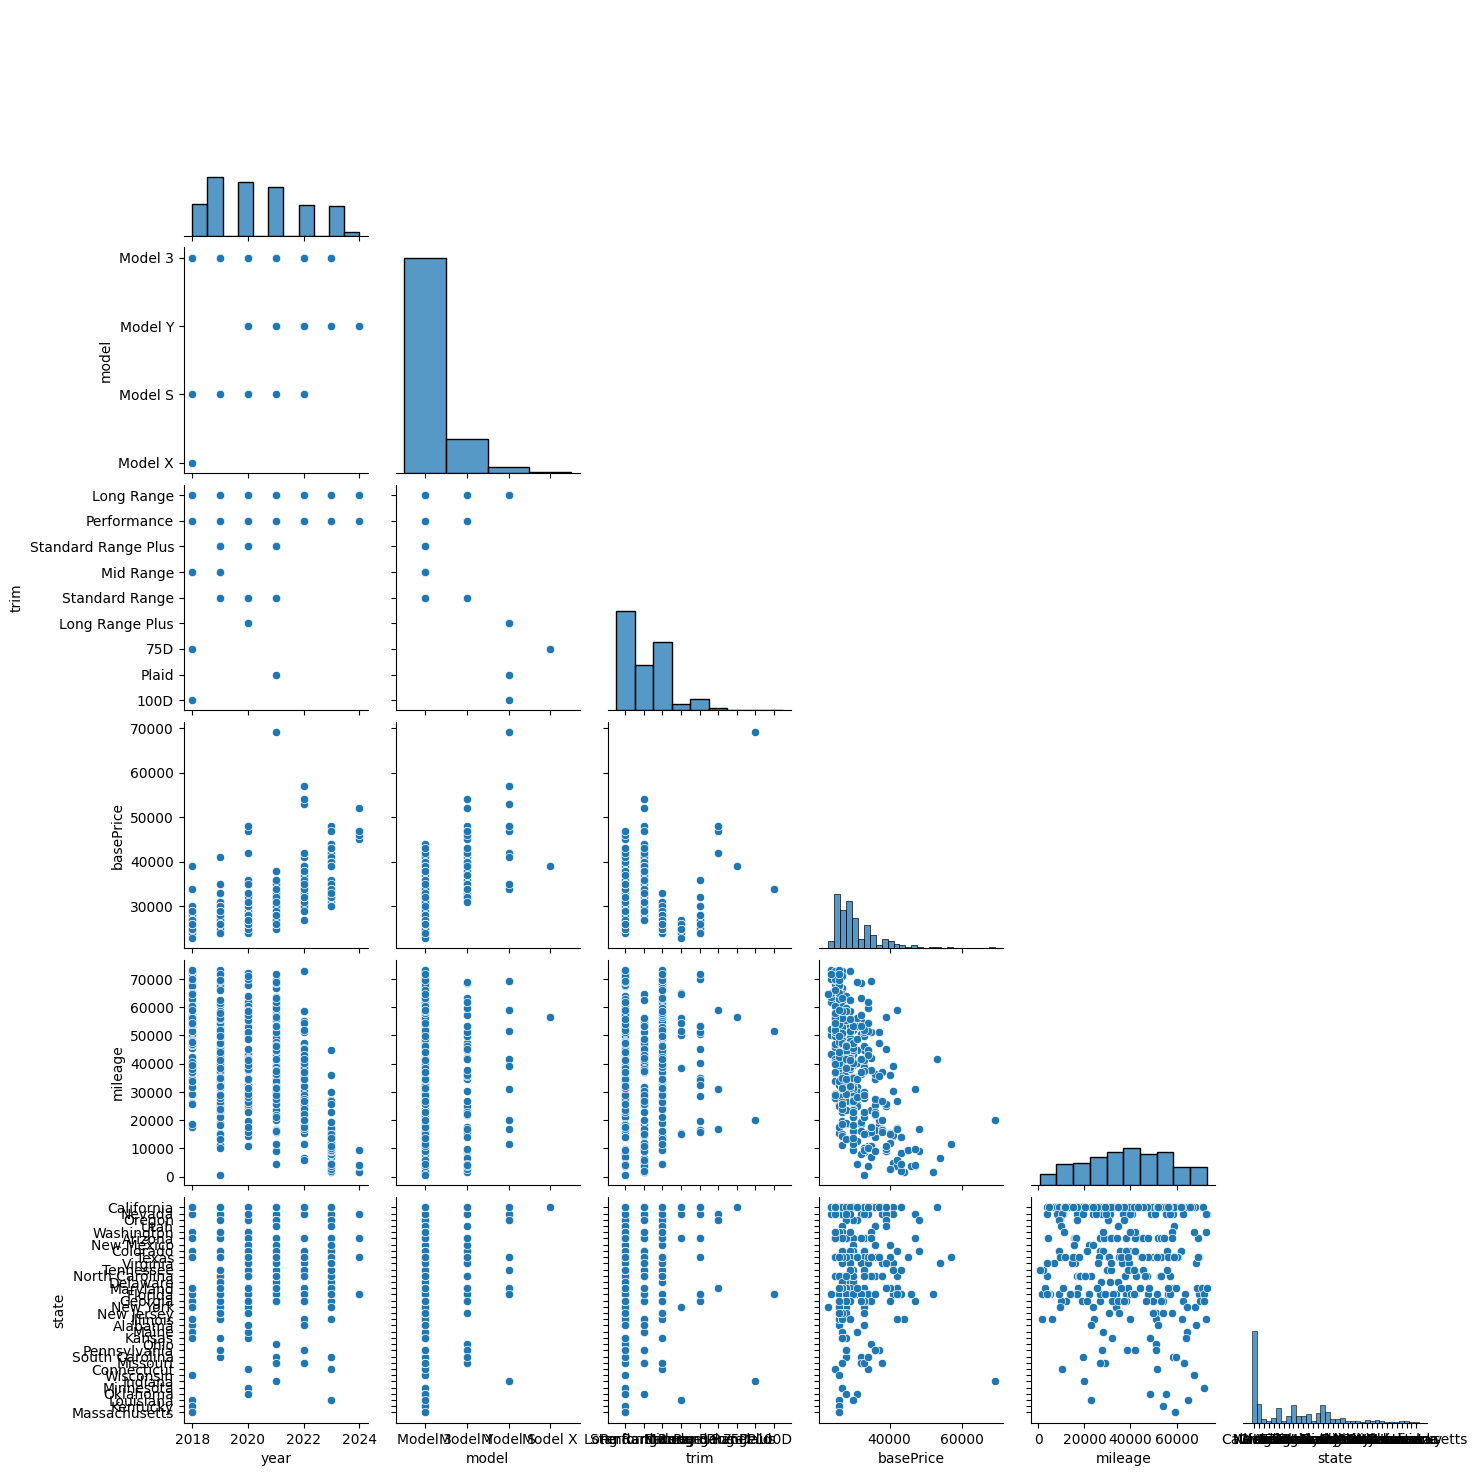

In [15]:
sns.pairplot(
    df,
    corner=True,
    vars=("year", "model", "trim", "basePrice", "mileage", "state"),
)

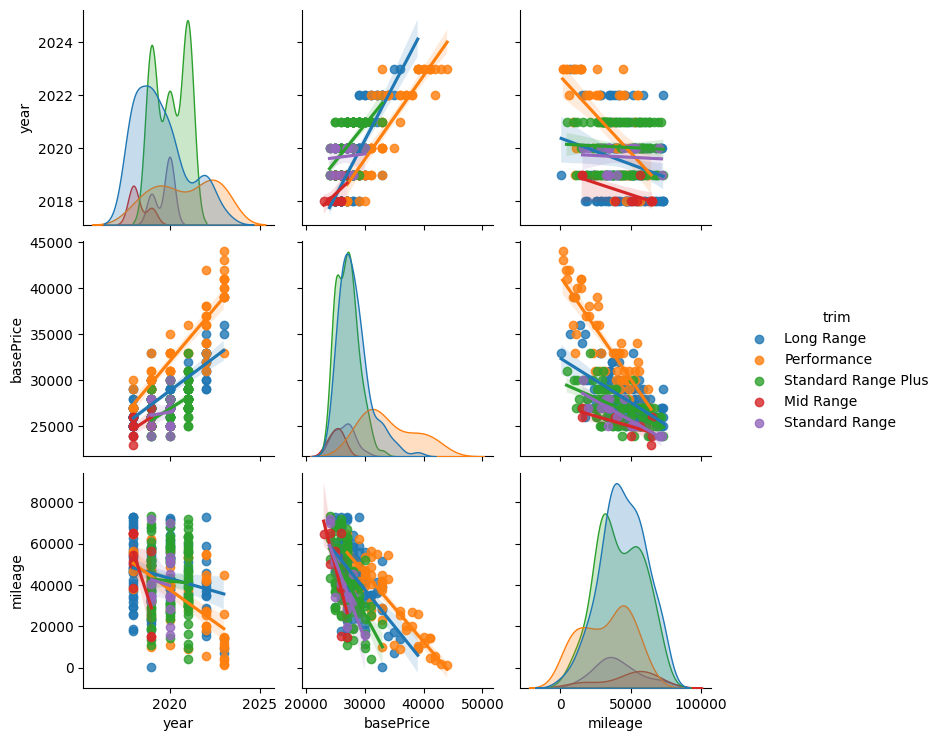

In [16]:
model3 = df[df["model"] == "Model 3"]
sns.pairplot(
    model3,
    vars=("year", "basePrice", "mileage"),
    hue="trim",
    kind="reg",
)

# ridge regression

In [17]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.linear_model import Ridge
from sklearn.metrics import mean_squared_error, r2_score

In [18]:
X = model3[['year', 'mileage', 'trim']]
y = model3['basePrice']

numeric_features = ['year', 'mileage']
categorical_features = ['trim']

preprocessor = ColumnTransformer(
    transformers=[
        ('num', StandardScaler(), numeric_features),
        ('cat', OneHotEncoder(), categorical_features)
    ])

ridge_pipeline = Pipeline([
    ('preprocessor', preprocessor),
    ('regressor', Ridge(alpha=1.0))
])

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
ridge_pipeline.fit(X_train, y_train)
y_pred = ridge_pipeline.predict(X_test)

mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

print(f"Mean Squared Error: {mse}")
print(f"R-squared Score: {r2}")

# coefficients
feature_names = (numeric_features + 
                 [f"{feature}_{cat}" for feature, cats in 
                  zip(categorical_features, ridge_pipeline.named_steps['preprocessor']
                      .named_transformers_['cat'].categories_) 
                  for cat in cats[1:]])

coefficients = ridge_pipeline.named_steps['regressor'].coef_
for name, coef in zip(feature_names, coefficients):
    print(f"{name}: {coef}")

Mean Squared Error: 1951759.157587081
R-squared Score: 0.8650467655013515
year: 2139.276329204075
mileage: -1413.0182318870104
trim_Mid Range: 766.9544827635651
trim_Performance: -194.81208891778158
trim_Standard Range: 3701.0599881240646
trim_Standard Range Plus: -1113.6375268121387
trim_None: -1154.8507260605943


In [19]:
model3['predictedPrice'] = ridge_pipeline.predict(model3)
model3['priceDifference'] = model3['predictedPrice'] - model3['basePrice']
model3.sort_values('priceDifference')

/tmp/ipykernel_81363/2959248984.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  model3['predictedPrice'] = ridge_pipeline.predict(model3)
/tmp/ipykernel_81363/2959248984.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  model3['priceDifference'] = model3['predictedPrice'] - model3['basePrice']


,stockNumber,vin,year,make,model,body,trim,basePrice,originalPrice,hasPriceDrop,...,vehicleSize,packages,types,series,isSavedCar,heroImageUrl,heroThumbnailImageUrl,url,predictedPrice,priceDifference
220,25821228,5YJ3E1EC5PF672915,2023,Tesla,Model 3,4D Sedan,Performance,43998.0,45998.0,True,...,None,[],None,None,False,https://img2.carmax.com/assets/25821228/hero.j...,None,https://www.carmax.com/car/25821228,39245.224086,-4752.775914
229,24758496,5YJ3E1EC8NF177623,2022,Tesla,Model 3,4D Sedan,Performance,41998.0,43998.0,True,...,None,[],None,None,False,https://img2.carmax.com/assets/24758496/hero.j...,None,https://www.carmax.com/car/24758496,37506.528993,-4491.471007
6,24686752,5YJ3E1EA0LF613778,2020,Tesla,Model 3,4D Sedan,Standard Range Plus,29998.0,30998.0,True,...,None,[],None,None,False,https://img2.carmax.com/assets/24686752/hero.j...,None,https://www.carmax.com/car/24686752,26143.723321,-3854.276679
238,25533050,5YJ3E1ECXPF399082,2023,Tesla,Model 3,4D Sedan,Performance,42998.0,NaN,False,...,None,[],None,None,False,https://img2.carmax.com/assets/25533050/hero.j...,None,https://www.carmax.com/car/25533050,39206.034448,-3791.965552
263,24770803,5YJ3E1EB7JF104129,2018,Tesla,Model 3,4D Sedan,Long Range,28998.0,NaN,False,...,None,[],None,None,False,https://img2.carmax.com/assets/24770803/hero.j...,None,https://www.carmax.com/car/24770803,25576.624092,-3421.375908
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
181,25828200,5YJ3E1EA8MF986035,2021,Tesla,Model 3,4D Sedan,Standard Range Plus,24998.0,26998.0,True,...,None,[],None,None,False,https://img2.carmax.com/assets/25828200/hero.j...,None,https://www.carmax.com/car/25828200,27433.518923,2435.518923
359,26081613,5YJ3E1EA4PF513172,2023,Tesla,Model 3,4D Sedan,None,29998.0,NaN,False,...,None,[],None,None,False,https://img2.carmax.com/assets/26081613/hero.j...,None,https://www.carmax.com/car/26081613,32546.996675,2548.996675
22,25993604,5YJ3E1EAXKF190738,2019,Tesla,Model 3,4D Sedan,Mid Range,25998.0,26998.0,True,...,None,[],None,None,False,https://img2.carmax.com/assets/25993604/hero.j...,None,https://www.carmax.com/car/25993604,28658.696843,2660.696843
16,25629609,5YJ3E1ECXPF383254,2023,Tesla,Model 3,4D Sedan,Performance,32998.0,34998.0,True,...,None,[],None,None,False,https://img2.carmax.com/assets/25629609/hero.j...,None,https://www.carmax.com/car/25629609,35742.528725,2744.528725


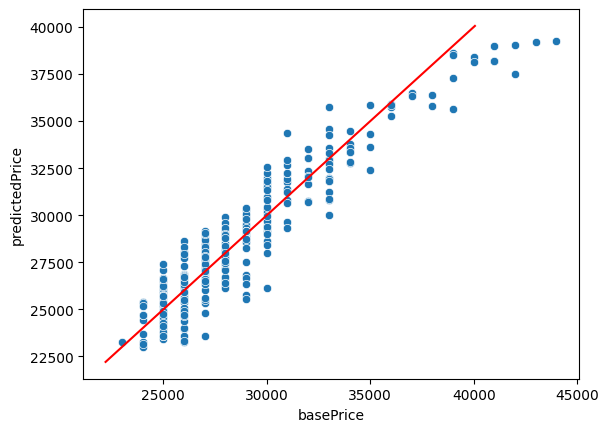

In [20]:
# below the line are overpriced
ax = sns.scatterplot(model3, x='basePrice', y="predictedPrice")
x0, x1 = ax.get_xlim()
y0, y1 = ax.get_ylim()
lims = [max(x0, y0), min(x1, y1)]
ax.plot(lims, lims, '-r')

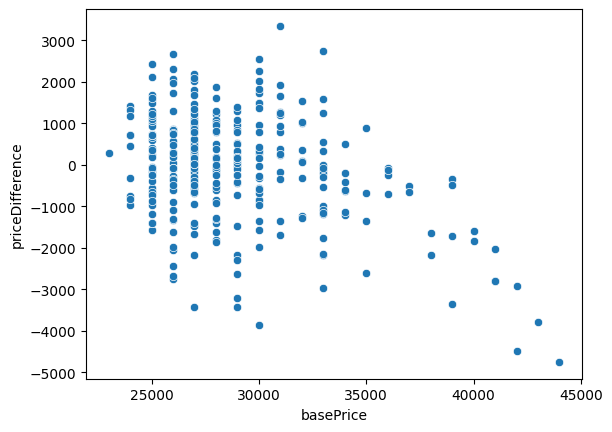

In [21]:
# randomly distributed error below 35000
ax = sns.scatterplot(model3, x='basePrice', y='priceDifference')

In [22]:
model3[model3['store'].isin(close_stores)][['url','store','mileage','year','trim','basePrice','predictedPrice','priceDifference']].sort_values("priceDifference", ascending=False)
# current favorites
# https://www.carmax.com/car/25797577	
# 25727676
# 25797161

,url,store,mileage,year,trim,basePrice,predictedPrice,priceDifference
16,https://www.carmax.com/car/25629609,Pleasant Hill,44847,2023,Performance,32998.0,35742.528725,2744.528725
1,https://www.carmax.com/car/26151126,Sacramento South,39430,2020,Performance,29998.0,32004.475789,2006.475789
20,https://www.carmax.com/car/25305876,Pleasant Hill,55966,2020,Long Range,25998.0,27731.444962,1733.444962
17,https://www.carmax.com/car/25728173,Fairfield,40989,2022,Long Range,29998.0,31728.583675,1730.583675
2,https://www.carmax.com/car/25797628,Sacramento South,29330,2019,Standard Range Plus,24998.0,26574.142309,1576.142309
5,https://www.carmax.com/car/26011240,Sacramento South,50786,2020,Standard Range Plus,24998.0,26229.066045,1231.066045
3,https://www.carmax.com/car/26040873,Sacramento South,39550,2020,Long Range,27998.0,29060.653844,1062.653844
9,https://www.carmax.com/car/26040648,Sacramento/Roseville,6956,2023,Long Range,34998.0,35876.469867,878.469867
14,https://www.carmax.com/car/25906737,Fairfield,25685,2019,Standard Range Plus,25998.0,26869.279150,871.279150
8,https://www.carmax.com/car/26040971,Sacramento/Roseville,41472,2021,Long Range,29998.0,30297.251942,299.251942


In [23]:
model3[model3['store'].isin(close_stores)].sort_values("basePrice")
#there's no cars that qualify for credit less than 25k
# https://evrebates.sce.com/
# https://www.irs.gov/credits-deductions/used-clean-vehicle-credit

,stockNumber,vin,year,make,model,body,trim,basePrice,originalPrice,hasPriceDrop,...,vehicleSize,packages,types,series,isSavedCar,heroImageUrl,heroThumbnailImageUrl,url,predictedPrice,priceDifference
2,25797628,5YJ3E1EA9KF299658,2019,Tesla,Model 3,4D Sedan,Standard Range Plus,24998.0,25998.0,True,...,None,[],None,None,False,https://img2.carmax.com/assets/25797628/hero.j...,None,https://www.carmax.com/car/25797628,26574.142309,1576.142309
5,26011240,5YJ3E1EA0LF718658,2020,Tesla,Model 3,4D Sedan,Standard Range Plus,24998.0,NaN,False,...,None,[],None,None,False,https://img2.carmax.com/assets/26011240/hero.j...,None,https://www.carmax.com/car/26011240,26229.066045,1231.066045
334,25758895,5YJ3E1EAXKF426904,2019,Tesla,Model 3,4D Sedan,Standard Range Plus,24998.0,NaN,False,...,None,[],None,None,False,https://img2.carmax.com/assets/25758895/hero.j...,None,https://www.carmax.com/car/25758895,23599.130566,-1398.869434
0,25797161,5YJ3E1EA8JF004872,2018,Tesla,Model 3,4D Sedan,Long Range,25998.0,NaN,False,...,None,[],None,None,False,https://img2.carmax.com/assets/25797161/hero.j...,None,https://www.carmax.com/car/25797161,26042.203470,44.203470
20,25305876,5YJ3E1EB6LF647961,2020,Tesla,Model 3,4D Sedan,Long Range,25998.0,27998.0,True,...,None,[],None,None,False,https://img2.carmax.com/assets/25305876/hero.j...,None,https://www.carmax.com/car/25305876,27731.444962,1733.444962
14,25906737,5YJ3E1EA3KF416179,2019,Tesla,Model 3,4D Sedan,Standard Range Plus,25998.0,27998.0,True,...,None,[],None,None,False,https://img2.carmax.com/assets/25906737/hero.j...,None,https://www.carmax.com/car/25906737,26869.279150,871.279150
11,25779608,5YJ3E1EAXMF048747,2021,Tesla,Model 3,4D Sedan,Standard Range Plus,26998.0,27998.0,True,...,None,[],None,None,False,https://img2.carmax.com/assets/25779608/hero.j...,None,https://www.carmax.com/car/25779608,26813.286220,-184.713780
4,25797234,5YJ3E1EA9KF304809,2019,Tesla,Model 3,4D Sedan,Standard Range Plus,26998.0,NaN,False,...,None,[],None,None,False,https://img2.carmax.com/assets/25797234/hero.j...,None,https://www.carmax.com/car/25797234,25317.887691,-1680.112309
19,26040224,5YJ3E1EB9KF437577,2019,Tesla,Model 3,4D Sedan,Long Range,27998.0,NaN,False,...,None,[],None,None,False,https://img2.carmax.com/assets/26040224/hero.j...,None,https://www.carmax.com/car/26040224,26586.910126,-1411.089874
18,25630619,5YJ3E1EB1LF629044,2020,Tesla,Model 3,4D Sedan,Long Range,27998.0,NaN,False,...,None,[],None,None,False,https://img2.carmax.com/assets/25630619/hero.j...,None,https://www.carmax.com/car/25630619,27944.477891,-53.522109
